# CSCI-B 365 Data Visualization & Cleaning
#### by Samuel Madden

## Notebook Setup

#### Libraries and Version Numbers

In [52]:
# Comment out any packages that arent installed
# !pip install missingno

In [2]:
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

print("Python Version: " + sys.version)
print("Pandas Version: " + pd.__version__)

Python Version: 3.6.5 (default, Mar 30 2018, 06:41:53) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
Pandas Version: 0.22.0


### Config File Options

In [3]:
config = json.load(open('config.json'))
config["training_filepath"]

'/Users/samuelmadden/Desktop/B365Final/B365Finalproject/data/train.csv'

### Magic Commands

In [4]:
%matplotlib inline

## Visualizing Dataset

In [7]:
train = pd.read_csv(config["training_filepath"])
#train = pd.read_csv(config["test_filepath"])
test = pd.read_csv(config["test_filepath"])

In [8]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

##### No instance of null values
"Values of -1 indicate that the feature was missing from the observation".

In [9]:
train_copy = train
num_rows_train = train_copy.shape[0]
#
test_copy = test
num_rows_test = test_copy.shape[0]

In [10]:
train_copy = train_copy.replace(-1, np.NaN)
print(train_copy.info())

test_copy = test_copy.replace(-1, np.NaN)
print(test_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

 Missing values become apparent: < 595212 <br>
 ###### Notable: ps_reg_03, ps_car_03_cat, ps_car_05_cat

Highlight missing values by column

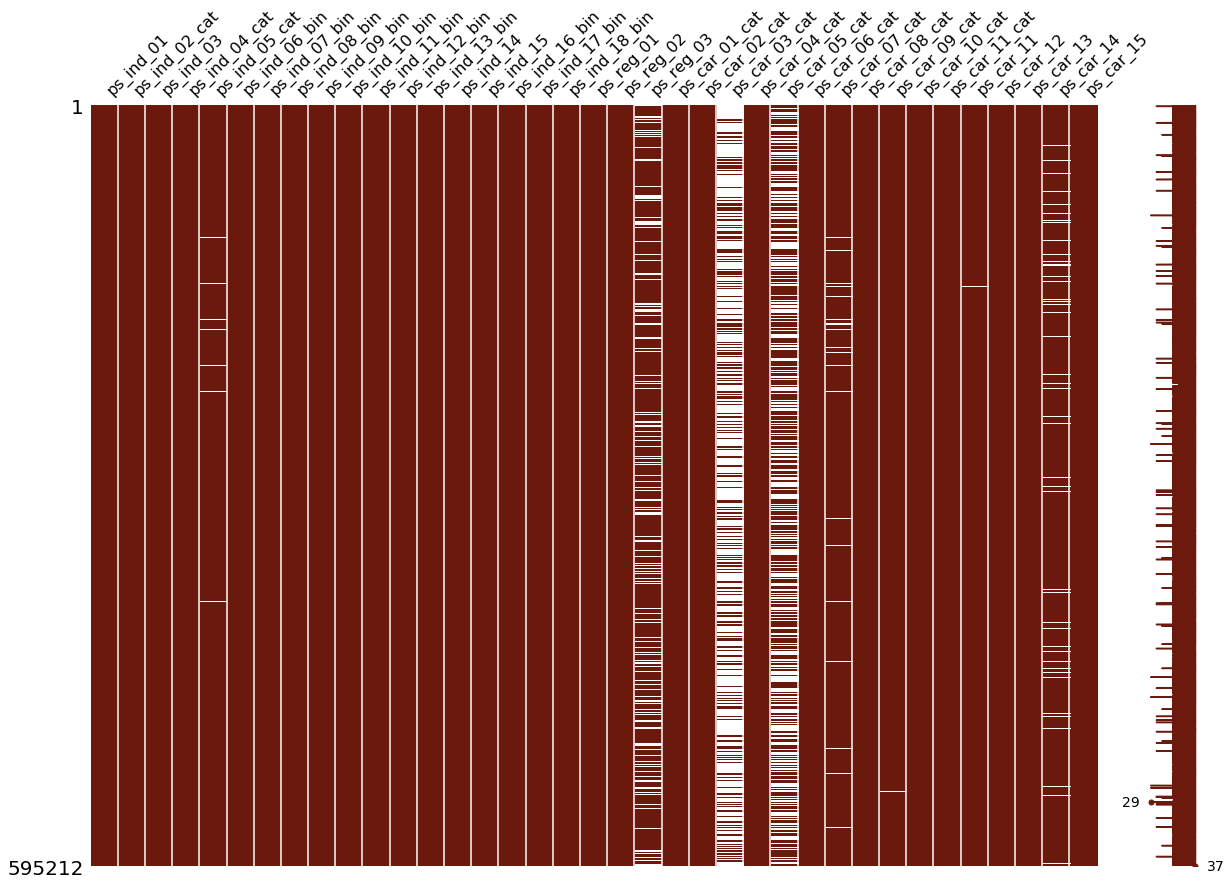

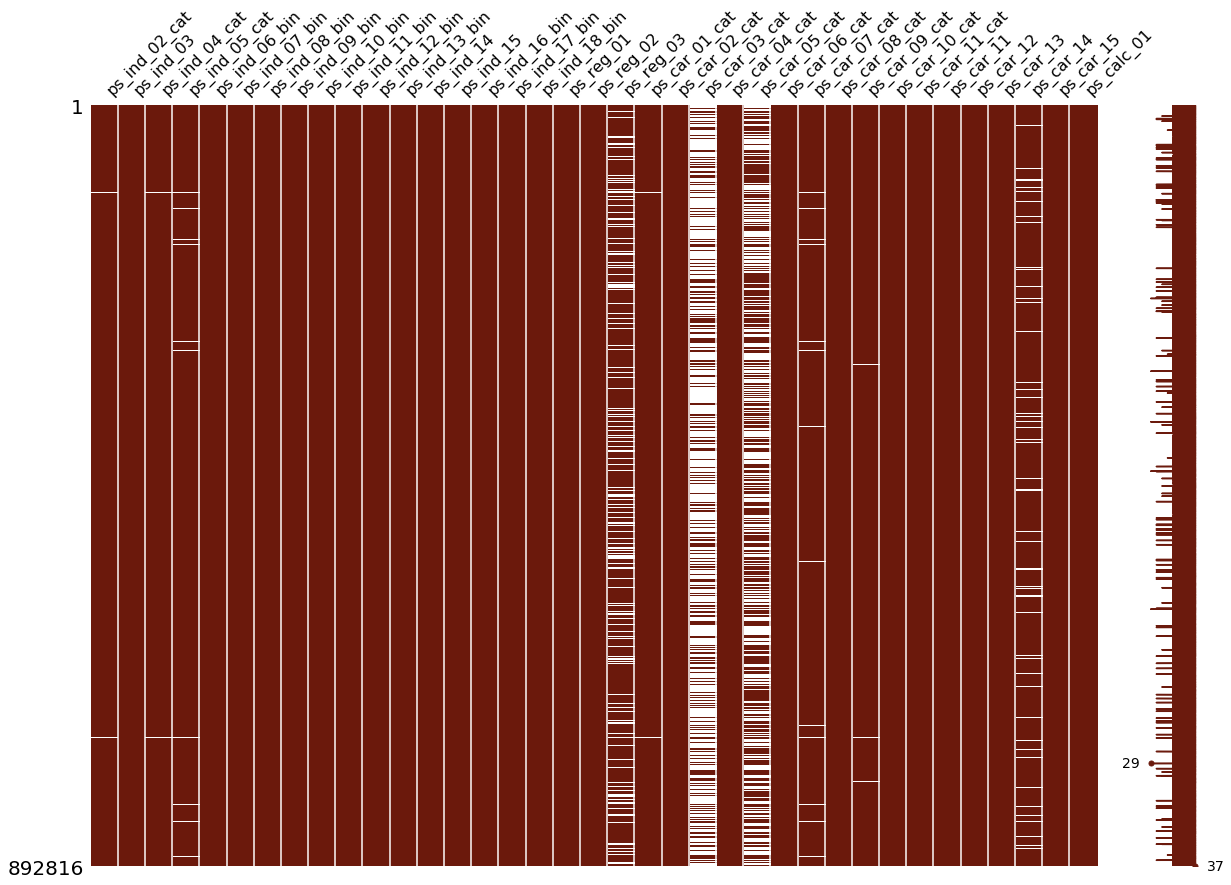

In [11]:
msno.matrix(df=train_copy.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))
plt.show()
#
msno.matrix(df=test_copy.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))
plt.show()

## Cleaning Dataset

drop ps_reg_03, ps_car_03_cat, ps_car_05_cat <br>

In [12]:
train_copy = train_copy.drop(['ps_reg_03', 'ps_car_03_cat', 'ps_car_05_cat'], axis=1)
test_copy = test_copy.drop(['ps_reg_03', 'ps_car_03_cat', 'ps_car_05_cat'], axis=1)

### Mean Imputation
##### replace remaining missing values with mean of respective column mean

In [13]:
from sklearn.preprocessing import Imputer

save column labels in string array

In [14]:
col_names_train = list(train_copy.columns.values)
col_names_test = list(test_copy.columns.values)

In [15]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
#
imr_train = imr.fit(train_copy)
imputed_trainset = imr.transform(train_copy.values)
# test set
imr_test = imr.fit(test_copy)
imputed_testset = imr_test.transform(test_copy.values)

convert current ndarray to dataFrame

In [17]:
cleaned_train = pd.DataFrame(imputed_trainset, columns=col_names_train)
print(cleaned_train.info())

cleaned_test = pd.DataFrame(imputed_testset, columns=col_names_test)
print(cleaned_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 56 columns):
id                595212 non-null float64
target            595212 non-null float64
ps_ind_01         595212 non-null float64
ps_ind_02_cat     595212 non-null float64
ps_ind_03         595212 non-null float64
ps_ind_04_cat     595212 non-null float64
ps_ind_05_cat     595212 non-null float64
ps_ind_06_bin     595212 non-null float64
ps_ind_07_bin     595212 non-null float64
ps_ind_08_bin     595212 non-null float64
ps_ind_09_bin     595212 non-null float64
ps_ind_10_bin     595212 non-null float64
ps_ind_11_bin     595212 non-null float64
ps_ind_12_bin     595212 non-null float64
ps_ind_13_bin     595212 non-null float64
ps_ind_14         595212 non-null float64
ps_ind_15         595212 non-null float64
ps_ind_16_bin     595212 non-null float64
ps_ind_17_bin     595212 non-null float64
ps_ind_18_bin     595212 non-null float64
ps_reg_01         595212 non-null float64
ps_reg_

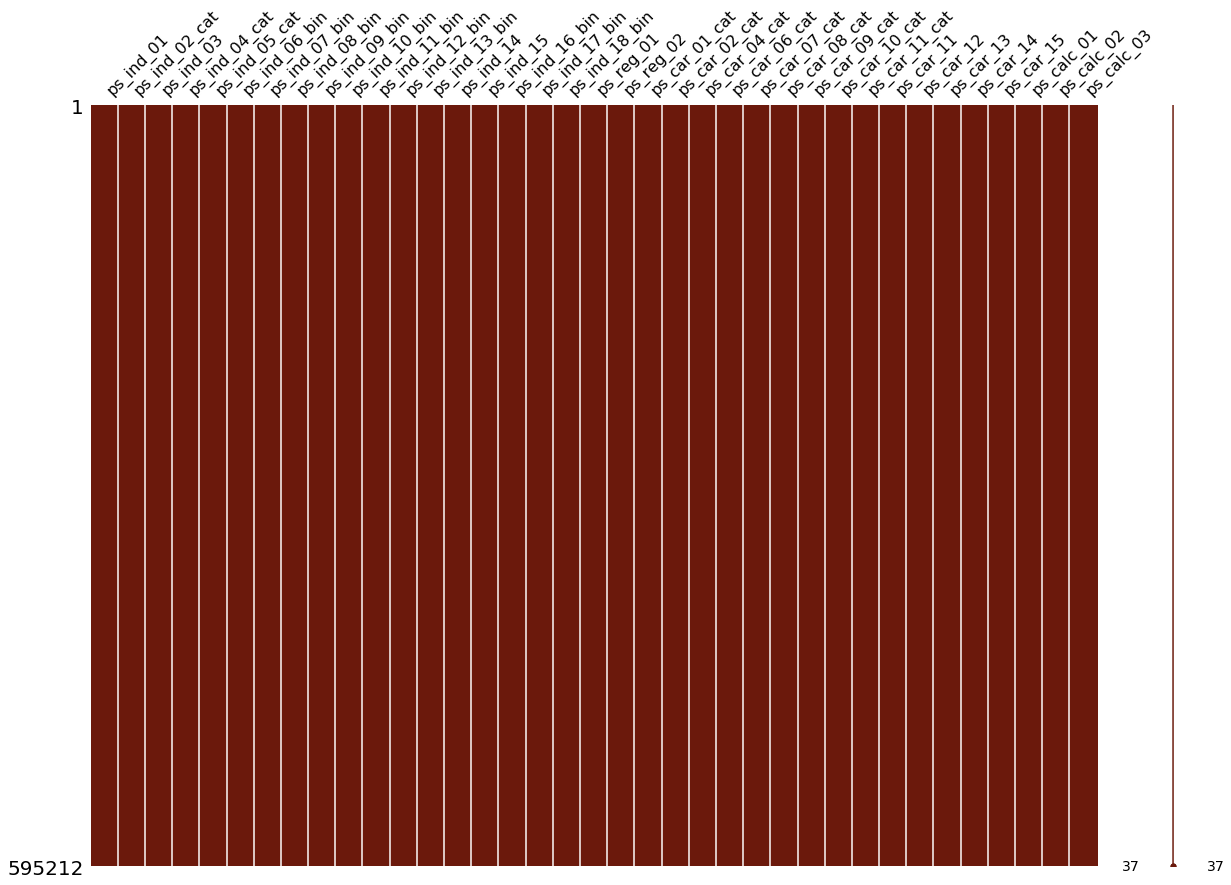

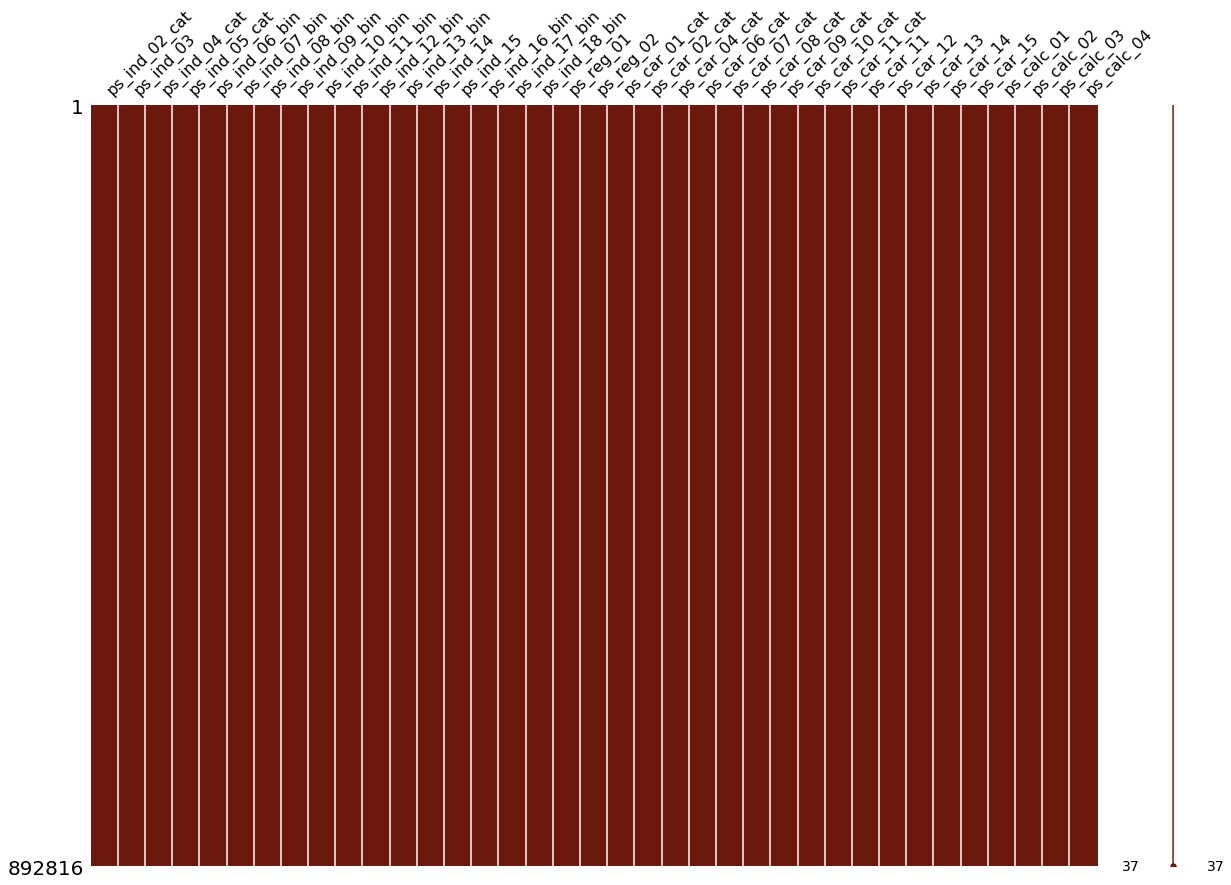

In [18]:
msno.matrix(df=cleaned_train.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))
plt.show()
#
msno.matrix(df=cleaned_test.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))
plt.show()

Print cleaned training data to config path

## Scaling DATASET

In [21]:
# Bringing features onto the same scale
print(cleaned_train.head(n=10))
print(cleaned_test.head(n=10))

# Standardization
# x_std = (xi - ux) / sx
from sklearn.preprocessing import StandardScaler
# store excluded columns
col_id_target_train = cleaned_train[['id','target']] 
col_id_test = cleaned_test[['id']]
#col_id_target = cleaned_train['id'] # Use with test

# exclude columns = 'id', 'target' from StandardScaler
X_train_puredata = cleaned_train.drop(['id','target'], axis=1) 
X_test_puredata = cleaned_test.drop(['id'], axis=1)

stdsc = StandardScaler()
# fit using training data
X_train_std_num = stdsc.fit_transform(X_train_puredata)
# use fit parameters to transform the test set
X_test_std_num = stdsc.transform(X_test_puredata)
# turn returned np.arrays back into DataFrame
X_train_std = pd.DataFrame(X_train_std_num, columns=col_names_train[2:])
X_test_std = pd.DataFrame(X_test_std_num, columns=col_names_test[1:])

X_train_std = pd.concat([col_id_target_train['id'],X_train_std], axis=1)
Y_train_std = col_id_target_train['target']
X_test_std = pd.concat([col_id_test, X_test_std], axis=1)

print(X_train_std.head(n=10))

     id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7.0     0.0        2.0            2.0        5.0            1.0   
1   9.0     0.0        1.0            1.0        7.0            0.0   
2  13.0     0.0        5.0            4.0        9.0            1.0   
3  16.0     0.0        0.0            1.0        2.0            0.0   
4  17.0     0.0        0.0            2.0        0.0            1.0   
5  19.0     0.0        5.0            1.0        4.0            0.0   
6  20.0     0.0        2.0            1.0        3.0            1.0   
7  22.0     0.0        5.0            1.0        4.0            0.0   
8  26.0     0.0        5.0            1.0        3.0            1.0   
9  28.0     1.0        1.0            1.0        2.0            0.0   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin       ...        \
0            0.0            0.0            1.0            0.0       ...         
1            0.0            0.0            0.0          

In [30]:
X_train_std.to_csv(config["standard_train_filepath"], na_rep="NaN", index=False)
#cleaned_train.to_csv(config["cleaned_test_filepath"], na_rep="NaN", index=False)
Y_train_std.to_csv(config["standard_train_filepath"], na_rep="NaN", index=False)
X_test_std.to_csv(config["standard_test_filepath"], na_rep="NaN", index=False)

